 <a id="1"></a>
# <p style="background-color:#44d180;font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">Importing Libraries</p>

In [ ]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cpcb_dly_aq_tamil_nadu-2014.csv to cpcb_dly_aq_tamil_nadu-2014 (1).csv


In [ ]:
df=pd.read_csv("/content/cpcb_dly_aq_tamil_nadu-2014.csv")
df

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN


#preprocessing

In [ ]:
df.columns


Index(['Stn Code', 'Sampling Date', 'State', 'City/Town/Village/Area',
       'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2',
       'NO2', 'RSPM/PM10', 'PM 2.5'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of       Stn Code Sampling Date       State City/Town/Village/Area  \
0           38      01-02-14  Tamil Nadu                Chennai   
1           38      01-07-14  Tamil Nadu                Chennai   
2           38      21-01-14  Tamil Nadu                Chennai   
3           38      23-01-14  Tamil Nadu                Chennai   
4           38      28-01-14  Tamil Nadu                Chennai   
...        ...           ...         ...                    ...   
2874       773      12-03-14  Tamil Nadu                 Trichy   
2875       773      12-10-14  Tamil Nadu                 Trichy   
2876       773      17-12-14  Tamil Nadu                 Trichy   
2877       773      24-12-14  Tamil Nadu                 Trichy   
2878       773      31-12-14  Tamil Nadu                 Trichy   

                        Location of Monitoring Station  \
0     Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1     Kathivakkam, Municipal Kalyana Mandapam, 

In [ ]:
df.describe

<bound method NDFrame.describe of       Stn Code Sampling Date       State City/Town/Village/Area  \
0           38      01-02-14  Tamil Nadu                Chennai   
1           38      01-07-14  Tamil Nadu                Chennai   
2           38      21-01-14  Tamil Nadu                Chennai   
3           38      23-01-14  Tamil Nadu                Chennai   
4           38      28-01-14  Tamil Nadu                Chennai   
...        ...           ...         ...                    ...   
2874       773      12-03-14  Tamil Nadu                 Trichy   
2875       773      12-10-14  Tamil Nadu                 Trichy   
2876       773      17-12-14  Tamil Nadu                 Trichy   
2877       773      24-12-14  Tamil Nadu                 Trichy   
2878       773      31-12-14  Tamil Nadu                 Trichy   

                        Location of Monitoring Station  \
0     Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1     Kathivakkam, Municipal Kalyana Mandapam

In [ ]:
def handle_missing_values(df):
    df.fillna(0, inplace=True)  # Replace missing values with 0
    return df
df = handle_missing_values(df)

In [ ]:
df.dtypes

Stn Code                            int64
Sampling Date                      object
State                              object
City/Town/Village/Area             object
Location of Monitoring Station     object
Agency                             object
Type of Location                   object
SO2                               float64
NO2                               float64
RSPM/PM10                         float64
PM 2.5                            float64
dtype: object

In [ ]:
# 2. Feature Scaling and Normalization
def scale_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    return df

features = ['Stn Code', 'SO2',
       'NO2', 'RSPM/PM10', 'PM 2.5']
df = scale_features(df, features)

In [ ]:
df

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,0.0,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.224490,0.239437,0.204461,NaN
1,0.0,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.265306,0.239437,0.167286,NaN
2,0.0,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.244898,0.253521,0.185874,NaN
3,0.0,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.306122,0.225352,0.171004,NaN
4,0.0,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.265306,0.197183,0.156134,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,1.0,12-03-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.306122,0.253521,0.379182,NaN
2875,1.0,12-10-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.244898,0.197183,0.338290,NaN
2876,1.0,17-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.387755,0.309859,0.371747,NaN
2877,1.0,24-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.306122,0.239437,0.353160,NaN


#EDA

In [ ]:
print(df.describe())

          Stn Code          SO2          NO2    RSPM/PM10  PM 2.5
count  2879.000000  2879.000000  2879.000000  2879.000000     0.0
mean      0.595579     0.233861     0.310378     0.231998     NaN
std       0.377790     0.103913     0.102336     0.116852     NaN
min       0.000000     0.000000     0.000000     0.000000     NaN
25%       0.272109     0.163265     0.239437     0.152416     NaN
50%       0.446259     0.244898     0.295775     0.204461     NaN
75%       0.987755     0.306122     0.352113     0.289963     NaN
max       1.000000     1.000000     1.000000     1.000000     NaN


In [ ]:
df=df.fillna(0)

In [ ]:
df.corr()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
Stn Code,1.000000,0.257289,-0.048771,0.337457,NaN
SO2,0.257289,1.000000,0.100779,0.440141,NaN
NO2,-0.048771,0.100779,1.000000,0.060369,NaN
RSPM/PM10,0.337457,0.440141,0.060369,1.000000,NaN
PM 2.5,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   float64
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2879 non-null   float64
 8   NO2                             2879 non-null   float64
 9   RSPM/PM10                       2879 non-null   float64
 10  PM 2.5                          2879 non-null   float64
dtypes: float64(5), object(6)
memory usage: 247.5+ KB
None


In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

           Stn Code       SO2       NO2  RSPM/PM10  PM 2.5
Stn Code   1.000000  0.257289 -0.048771   0.337457     NaN
SO2        0.257289  1.000000  0.100779   0.440141     NaN
NO2       -0.048771  0.100779  1.000000   0.060369     NaN
RSPM/PM10  0.337457  0.440141  0.060369   1.000000     NaN
PM 2.5          NaN       NaN       NaN        NaN     NaN


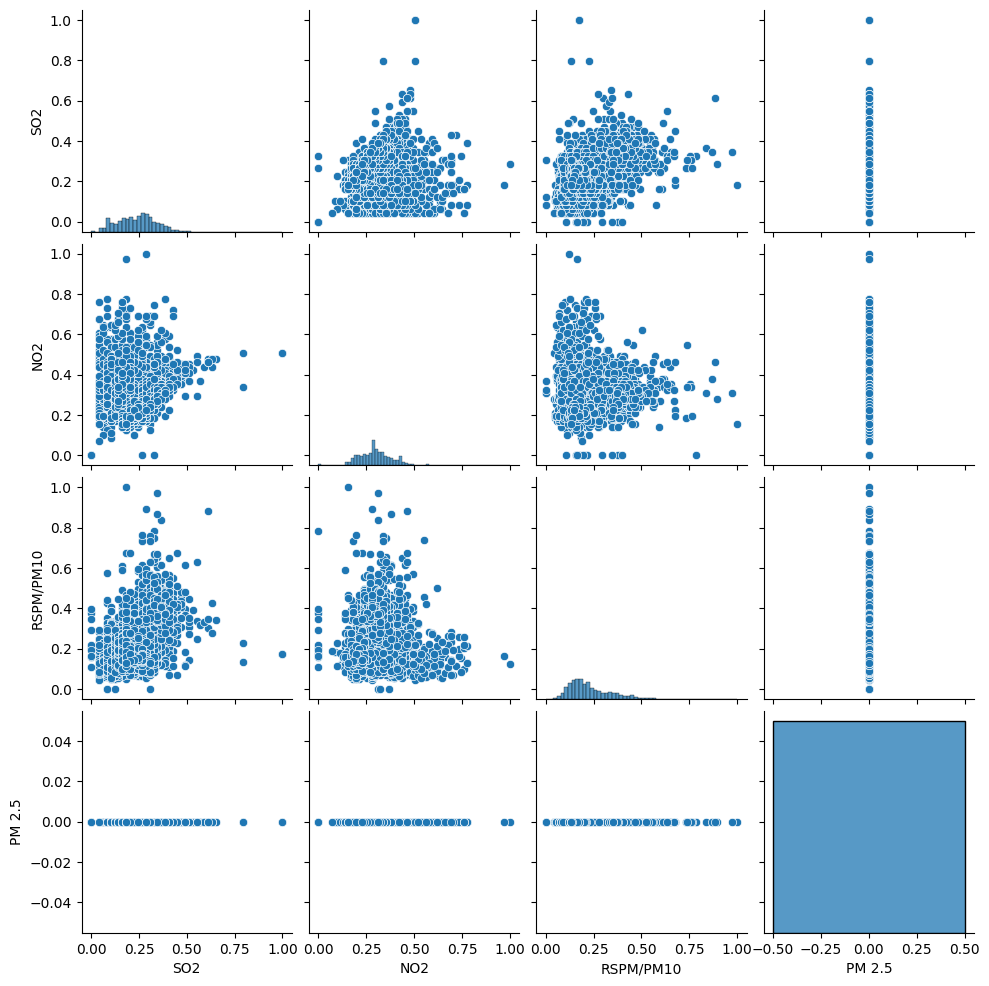

In [ ]:
# Pairplot
sns.pairplot(df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']])
plt.show()

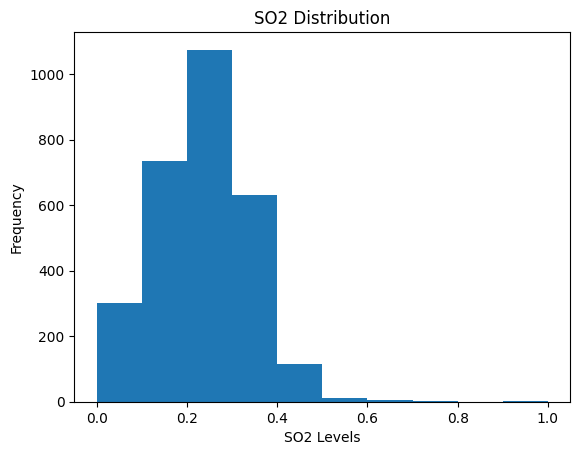

In [ ]:
# Histogram
plt.hist(df['SO2'], bins=10)
plt.xlabel('SO2 Levels')
plt.ylabel('Frequency')
plt.title('SO2 Distribution')
plt.show()

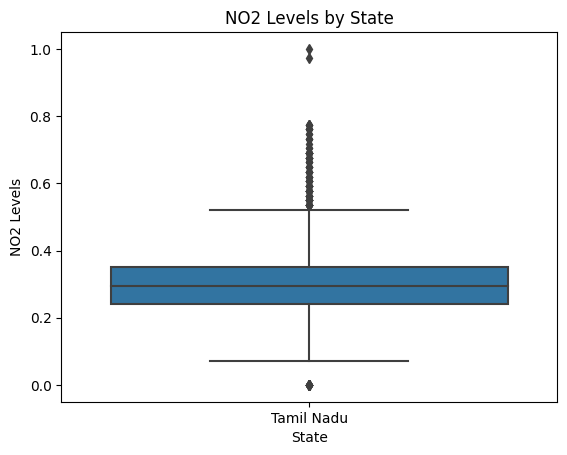

In [ ]:
# Box plot
sns.boxplot(x='State', y='NO2', data=df)
plt.xlabel('State')
plt.ylabel('NO2 Levels')
plt.title('NO2 Levels by State')
plt.show()

In [ ]:
df['State'].value_counts()

Tamil Nadu    2879
Name: State, dtype: int64

In [ ]:
df.dtypes

Stn Code                          float64
Sampling Date                      object
State                              object
City/Town/Village/Area             object
Location of Monitoring Station     object
Agency                             object
Type of Location                   object
SO2                               float64
NO2                               float64
RSPM/PM10                         float64
PM 2.5                            float64
dtype: object

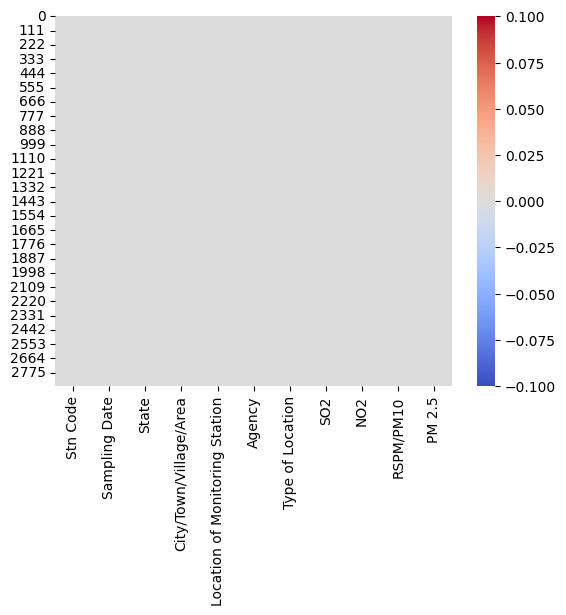

In [ ]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

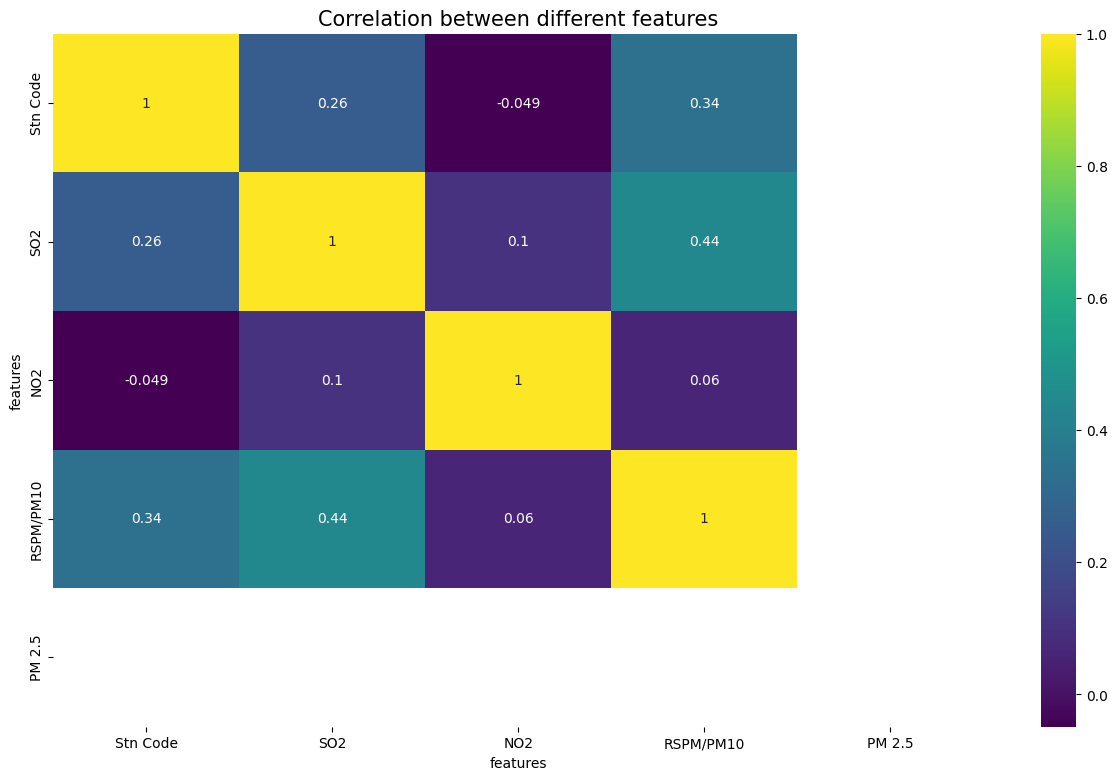

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

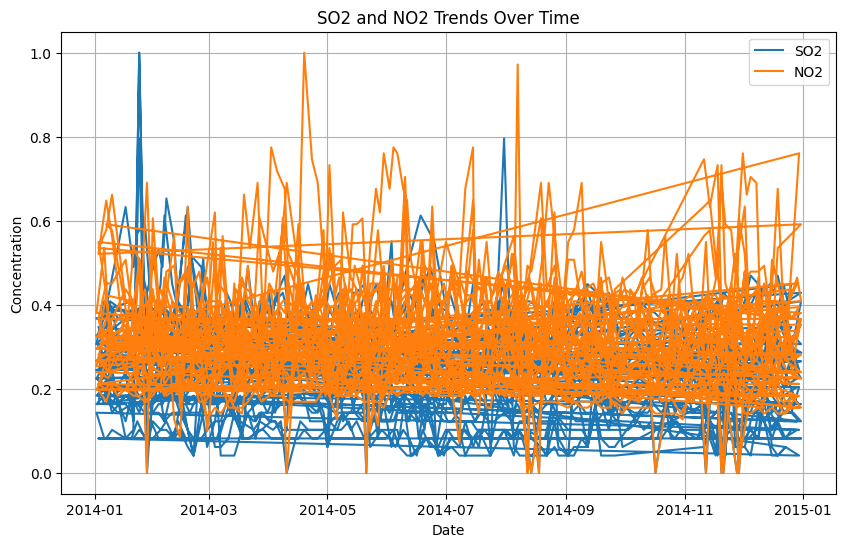

In [ ]:


# Let's assume 'Sampling Date' is in the datetime format. If not, you may need to convert it.
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

# Import Matplotlib
import matplotlib.pyplot as plt

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2')
plt.plot(df['Sampling Date'], df['NO2'], label='NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('SO2 and NO2 Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


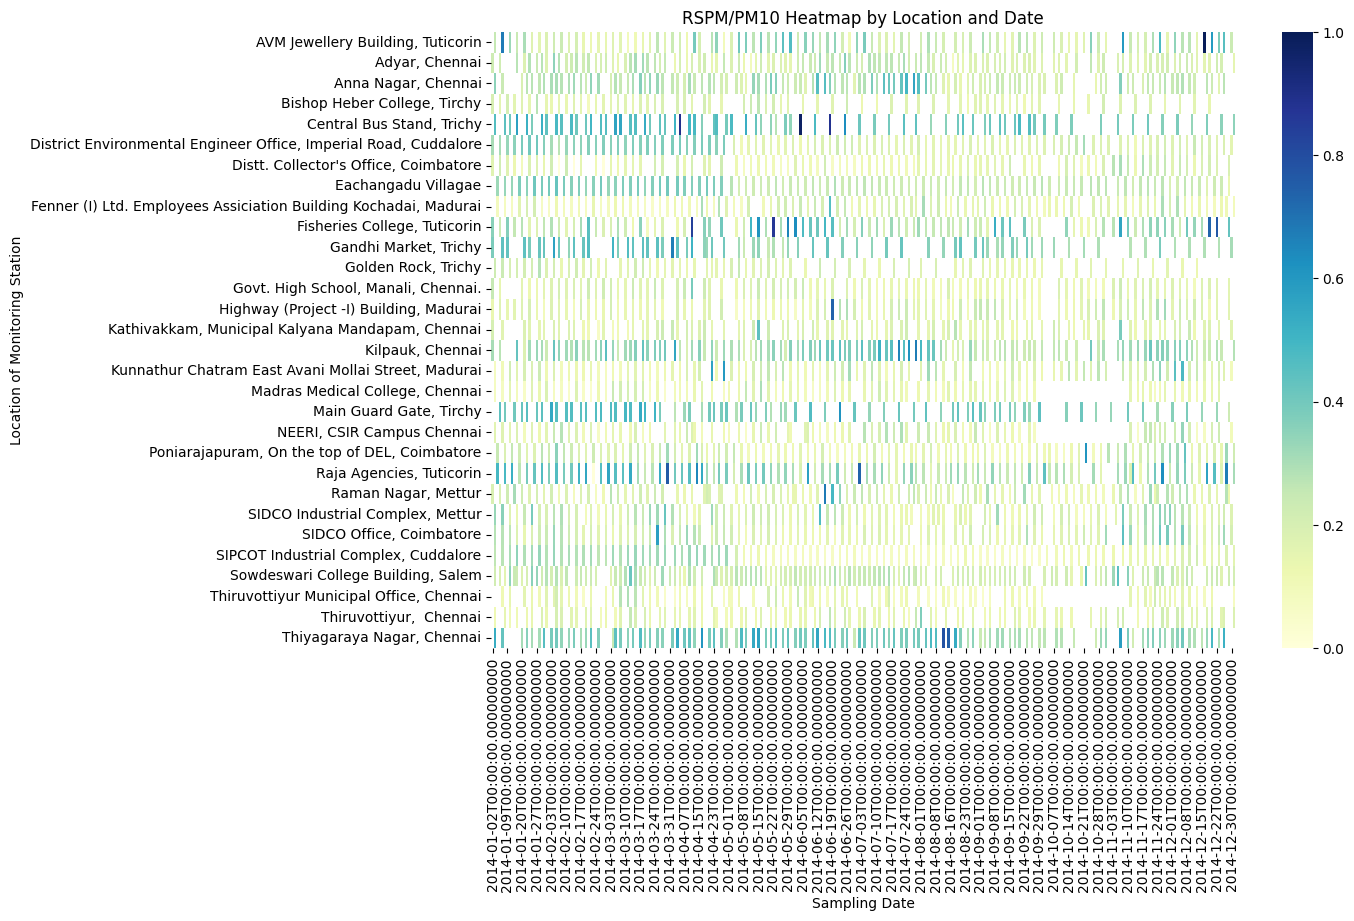

In [ ]:
import seaborn as sns
import numpy as np

heatmap_data = df.pivot_table(index='Location of Monitoring Station', columns='Sampling Date', values='RSPM/PM10', aggfunc=np.mean)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('RSPM/PM10 Heatmap by Location and Date')
plt.show()


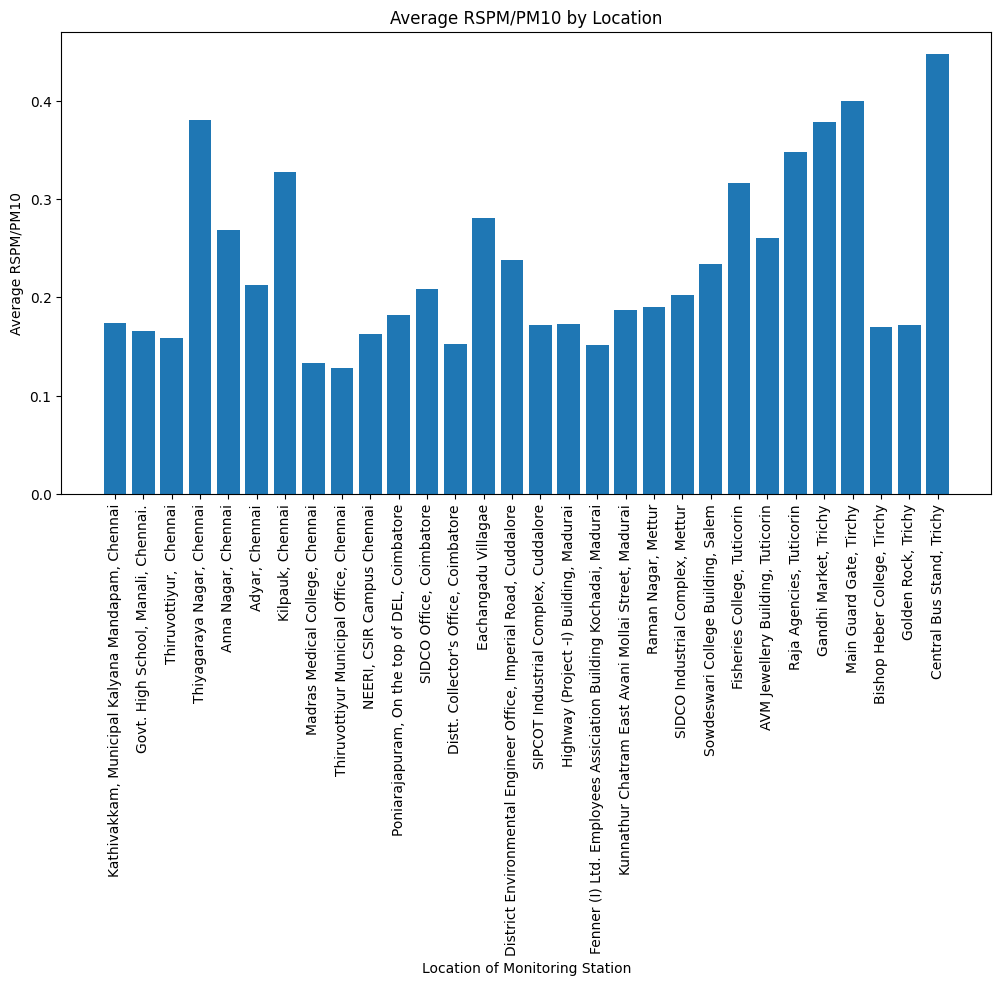

In [ ]:
# Bar Chart
plt.figure(figsize=(12, 6))
locations = df['Location of Monitoring Station'].unique()
avg_rspm = [df[df['Location of Monitoring Station'] == loc]['RSPM/PM10'].mean() for loc in locations]
plt.bar(locations, avg_rspm)
plt.xlabel('Location of Monitoring Station')
plt.ylabel('Average RSPM/PM10')
plt.title('Average RSPM/PM10 by Location')
plt.xticks(rotation=90)
plt.show()


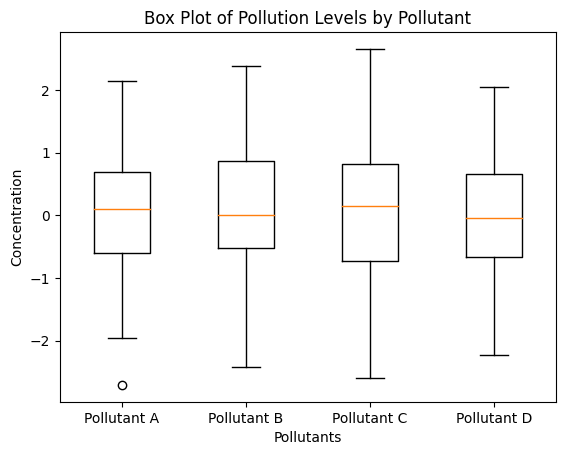

In [ ]:

df = np.random.randn(100, 4)  # Replace with your pollution level data

# Create a box plot
plt.boxplot(df, labels=['Pollutant A', 'Pollutant B', 'Pollutant C', 'Pollutant D'])
plt.xlabel('Pollutants')
plt.ylabel('Concentration')
plt.title('Box Plot of Pollution Levels by Pollutant')
plt.show()


Average

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014.csv')
da= pd.DataFrame(df)
avg_SO2 = da.groupby('City/Town/Village/Area')['SO2'].mean()
print(avg_SO2)

City/Town/Village/Area
Chennai        13.014042
Coimbatore      4.541096
Cuddalore       8.965986
Madurai        13.319728
Mettur          8.429268
Salem           8.114504
Thoothukudi    12.989691
Trichy         15.293956
Name: SO2, dtype: float64


In [ ]:
avg_NO2 = da.groupby('City/Town/Village/Area')['NO2'].mean()
print(avg_NO2)

City/Town/Village/Area
Chennai        22.088442
Coimbatore     25.325342
Cuddalore      19.710884
Madurai        25.768707
Mettur         23.185366
Salem          28.664122
Thoothukudi    18.512027
Trichy         18.695055
Name: NO2, dtype: float64


In [ ]:
avg_RSPM = da.groupby('City/Town/Village/Area')['RSPM/PM10'].mean()
print(avg_RSPM)

City/Town/Village/Area
Chennai        58.998000
Coimbatore     49.217241
Cuddalore      61.881757
Madurai        45.724490
Mettur         52.721951
Salem          62.954198
Thoothukudi    83.458904
Trichy         85.054496
Name: RSPM/PM10, dtype: float64


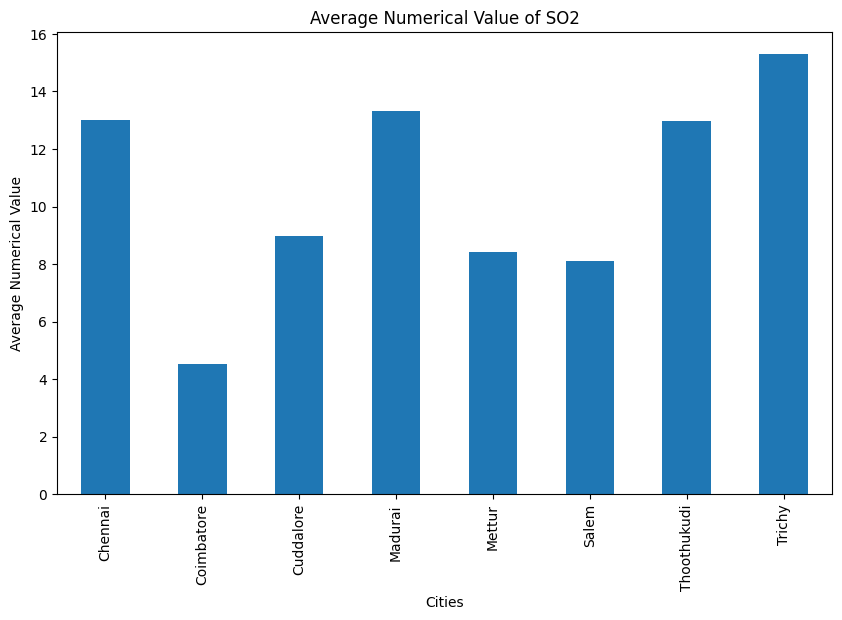

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
avg_SO2.plot(kind='bar')
plt.title('Average Numerical Value of SO2')
plt.xlabel('Cities')
plt.ylabel('Average Numerical Value')
plt.show()

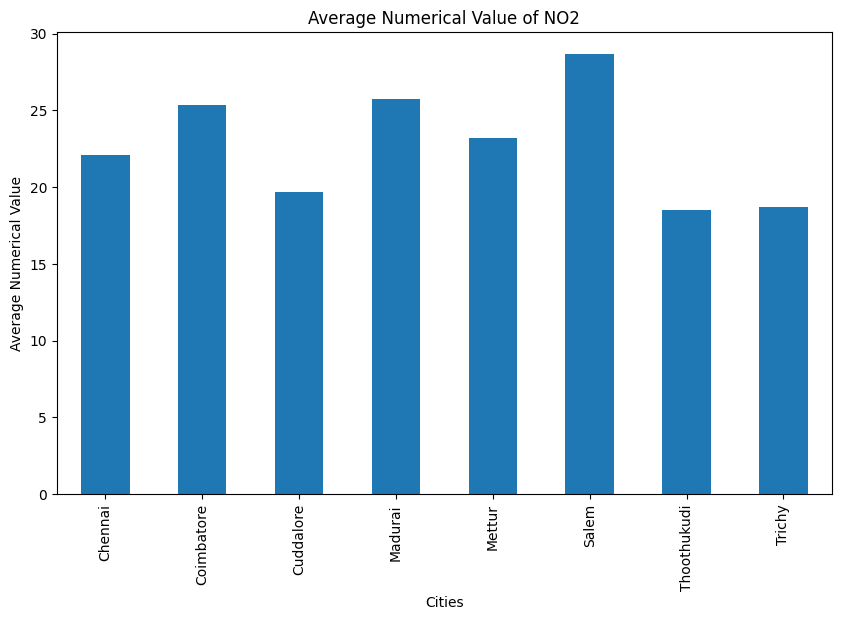

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
avg_NO2.plot(kind='bar')
plt.title('Average Numerical Value of NO2')
plt.xlabel('Cities')
plt.ylabel('Average Numerical Value')
plt.show()

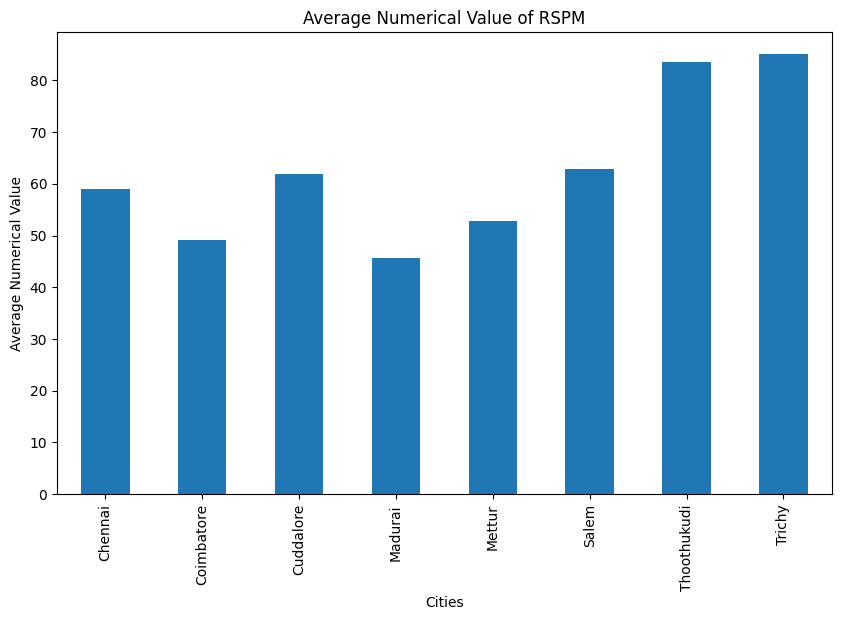

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
avg_RSPM.plot(kind='bar')
plt.title('Average Numerical Value of RSPM')
plt.xlabel('Cities')
plt.ylabel('Average Numerical Value')
plt.show()

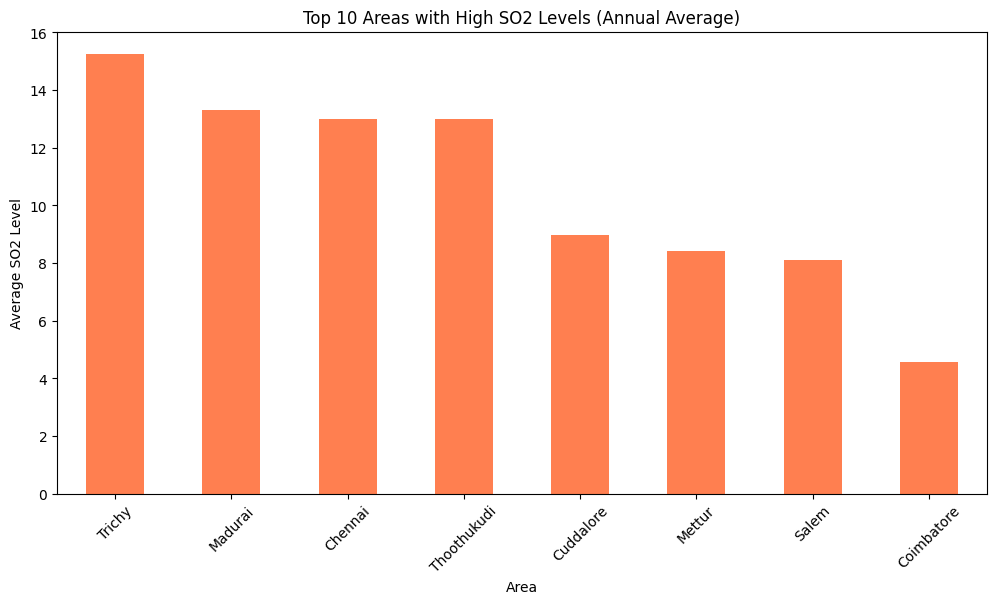

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014.csv')

# Data cleaning and preparation
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])  # Convert 'Sampling Date' to datetime
df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']] = df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].fillna(df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].mean())

# Data aggregation
df['Year'] = df['Sampling Date'].dt.year  # Extract the year from the date
city_so2 = df.groupby(['City/Town/Village/Area', 'Year'])['SO2'].mean().reset_index()

# Data visualization
plt.figure(figsize=(12, 6))
high_so2_areas = city_so2.groupby('City/Town/Village/Area')['SO2'].mean().nlargest(10)
high_so2_areas.plot(kind='bar', color='coral')
plt.title('Top 10 Areas with High SO2 Levels (Annual Average)')
plt.xlabel('Area')
plt.ylabel('Average SO2 Level')
plt.xticks(rotation=45)
plt.show()


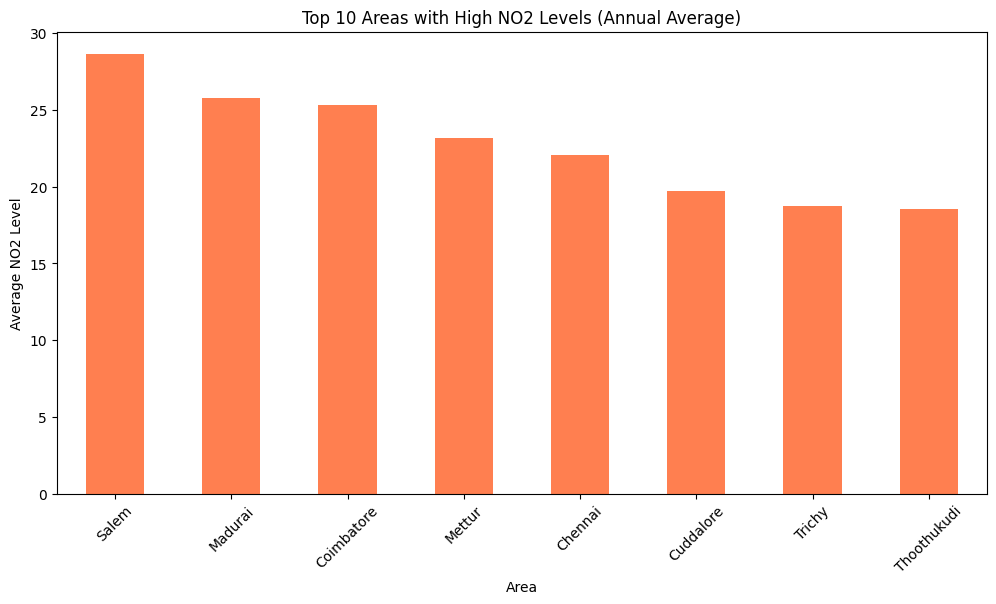

In [ ]:
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])  # Convert 'Sampling Date' to datetime
df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']] = df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].fillna(df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].mean())

# Data aggregation
df['Year'] = df['Sampling Date'].dt.year  # Extract the year from the date
city_so2 = df.groupby(['City/Town/Village/Area', 'Year'])['NO2'].mean().reset_index()

# Data visualization
plt.figure(figsize=(12, 6))
high_so2_areas = city_so2.groupby('City/Town/Village/Area')['NO2'].mean().nlargest(10)
high_so2_areas.plot(kind='bar', color='coral')
plt.title('Top 10 Areas with High NO2 Levels (Annual Average)')
plt.xlabel('Area')
plt.ylabel('Average NO2 Level')
plt.xticks(rotation=45)
plt.show()